In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(60000, 28, 28)
(60000,)
train_labels_data [5 0 4 1 9 2 1 3]


(10000,)
(10000, 28, 28)
test_labels_data [5 0 4 1 9 2 1 3]


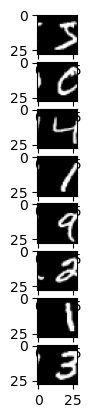

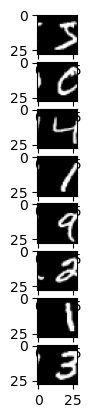

In [2]:
def load_idx_file(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number
        magic_number = int.from_bytes(f.read(4), byteorder='big')

        # Read the number of items (rows)
        num_items = int.from_bytes(f.read(4), byteorder='big')

        # Read the data (doesn't read the whole file. It passes 4+4 bytes of data)
        data = np.frombuffer(f.read(), dtype=np.uint8)

    return data


path = sys.path[0]

trian_labels_path = path + '/mnist database/train-labels.idx1-ubyte'
trian_images_path = path + '/mnist database/train-images.idx3-ubyte'
test_labels_path = path + '/mnist database/t10k-labels.idx1-ubyte'
test_images_path = path + '/mnist database/t10k-images.idx3-ubyte'

train_labels_data = load_idx_file(trian_labels_path)
train_images_data = load_idx_file(trian_images_path)

test_labels_data = load_idx_file(test_labels_path)
test_images_data = load_idx_file(test_images_path)

image_dims = 28 * 28


# Remove the remainder from the one dim ndarray for train_images_data
additional_photo_pixels_to_be_removed = 8
train_images_data = train_images_data[:-additional_photo_pixels_to_be_removed]

images_count = train_images_data.shape[0] // image_dims

train_images_data = train_images_data.reshape((images_count, 28, 28))

# Train data testing
print(train_images_data.shape)
print(train_labels_data.shape)

# Testing if the deleted data reordered the rest of the data:
print(f"train_labels_data {train_labels_data[:8]}")

fig, axes = plt.subplots(8,1)
for i in range(0,8):
    axes[i].imshow(train_images_data[i], cmap="gray", )

    
# Remove the remainder from the one dim ndarray for train_images_data
additional_photos_to_be_removed = 8
test_images_data = test_images_data[:-additional_photos_to_be_removed]

images_count = test_images_data.shape[0] // image_dims

test_images_data = test_images_data.reshape((images_count, 28, 28))

# Test data testing
print(f"\n\n{test_labels_data.shape}")
print(test_images_data.shape)

# Testing if the deleted data reordered the rest of the data:
print(f"test_labels_data {train_labels_data[:8]}")

fig, axes = plt.subplots(8,1)
for i in range(0,8):
    axes[i].imshow(train_images_data[i], cmap="gray", )

In [3]:
# Apply the model
from sklearn.ensemble import RandomForestClassifier

X_train = train_images_data.reshape(60000, 784)
y_train = train_labels_data

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Prediction & Accuracy
from sklearn.metrics import accuracy_score

X_test = test_images_data.reshape(10000, 784)
y_test = test_labels_data

y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print(f"{test_accuracy * 100} %")

96.95 %


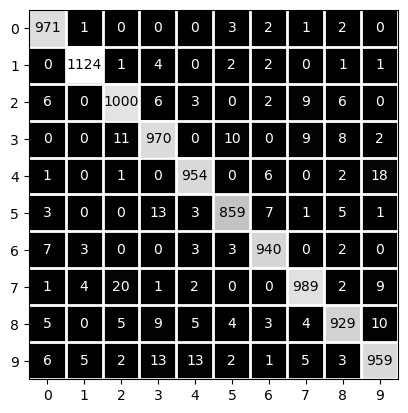

In [57]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, axes = plt.subplots()

axes.imshow(cm, cmap="gray")

# lines on the chart
for i in range(0,10):
    axes.axhline(0.5 + i, color='white', linewidth=2)
    axes.axvline(0.5 + i, color='white', linewidth=2)
   
# numbers on the chart titles
plt.xticks(np.arange(0,10,1))
plt.yticks(np.arange(0,10,1))

# numbers in the chart
for i in range(10):
    for j in range(10):
        if i==j:
            axes.annotate(str(cm[i, j]), (j, i), color='black', fontsize=10, ha='center', va='center')
        else:
            axes.annotate(str(cm[i, j]), (j, i), color='white', fontsize=10, ha='center', va='center')


In [72]:
# Precision, Recall & F1 Score 
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_true=y_test, y_pred=y_pred)

print(f"Precision: {round(precision[0], 2)}\nRecall: {round(recall[0], 2)}\nF1-Score: {round(f1[0], 2)}")

Precision: 0.97
Recall: 0.99
F1-Score: 0.98


In [73]:
# Classification report
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test, y_pred=y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



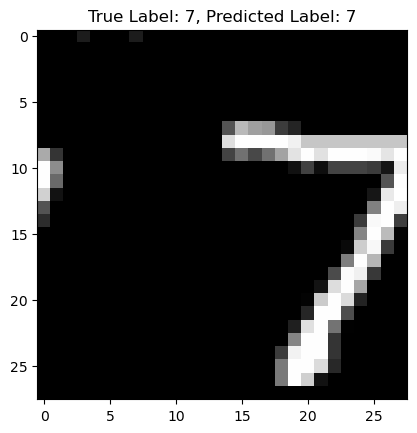

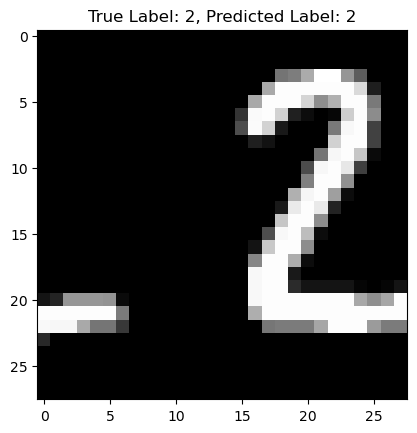

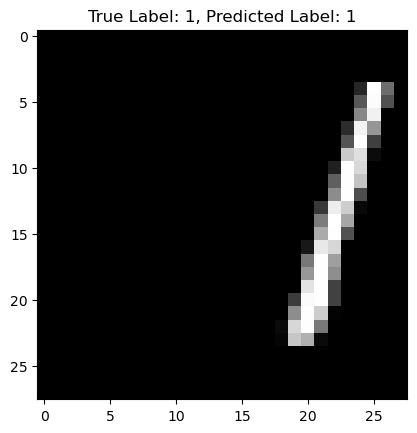

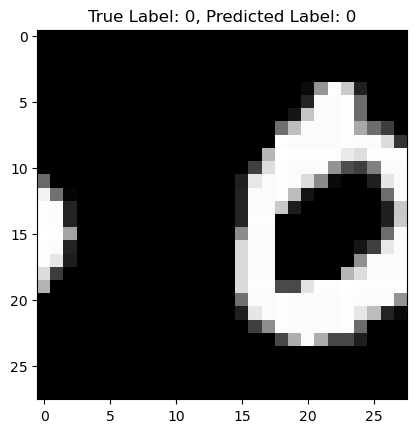

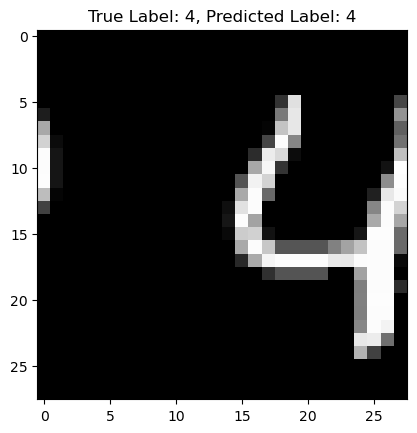

In [76]:
# Some test data visualized
sample_indices = [0, 1, 2, 3, 4]  # You can choose which data to be visualized.
X_test = test_images_data
for idx in sample_indices:
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray', )
    plt.title(f"True Label: {y_test[idx]}, Predicted Label: {y_pred[idx]}")
    plt.
    plt.show(s)